In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
#sns.set_palette("Set1")
#sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

# (Section 1) Before neural networks: Logistic regression

## 1.1 The iris datase

In [23]:
iris = sns.load_dataset("iris")

In [24]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
list_of_species = list(set(iris.species))
print(list_of_species)

['setosa', 'virginica', 'versicolor']


In [26]:
iris.shape

(150, 5)

In [27]:
iris.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

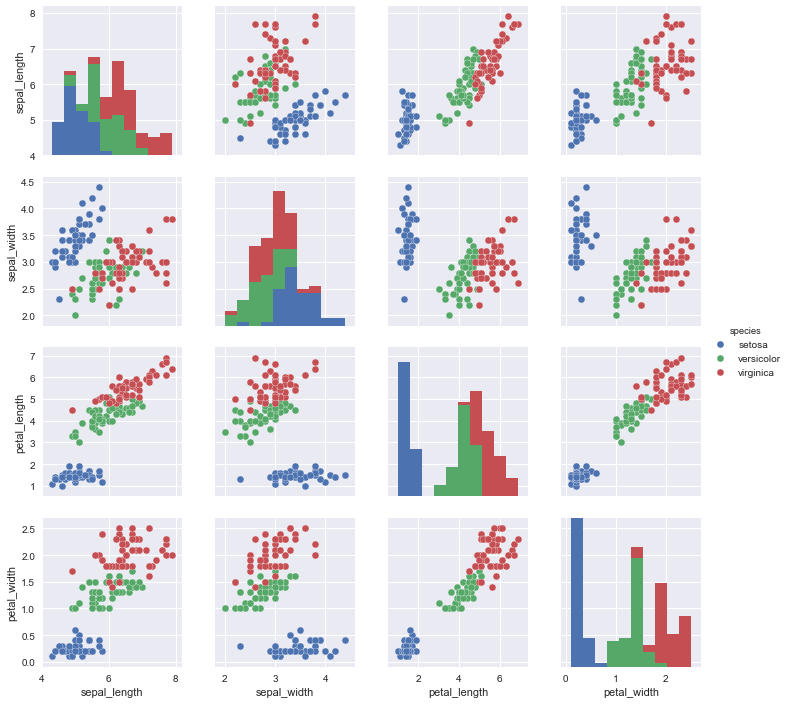

In [28]:
sns.pairplot(iris, hue="species");

In [29]:
def plot_histogram(my_species,feature,n_bins=20,normed=None,data=iris):
    """Plot a histogram of the given feature according to a given species."""
    mask = data['species']==my_species
    hist0 = data[feature][~mask]
    hist1 = data[feature][mask]
    histograms = [hist0,hist1]
    labels = ['not '+my_species, my_species]
    fig,ax = plt.subplots(figsize=(12,5))
    plt.hist(histograms, histtype='bar',bins=n_bins,normed=normed,label=labels);
    plt.title(my_species,fontsize='xx-large')
    plt.xlabel(feature,fontsize='x-large')
    plt.legend(fontsize='x-large')
    ax.tick_params(labelsize='large')

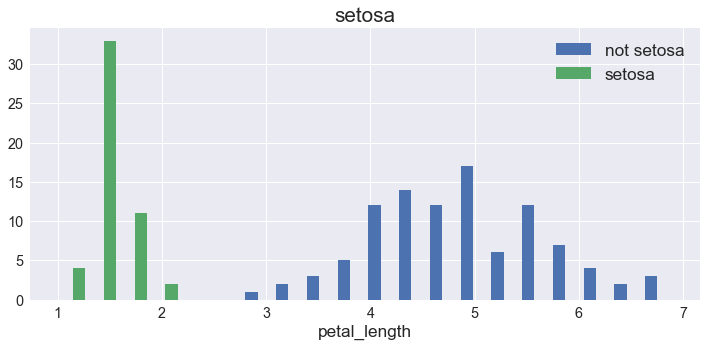

In [30]:
plot_histogram('setosa','petal_length')

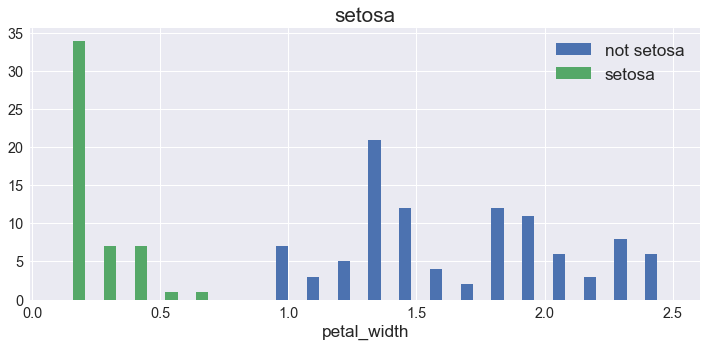

In [31]:
plot_histogram('setosa','petal_width')

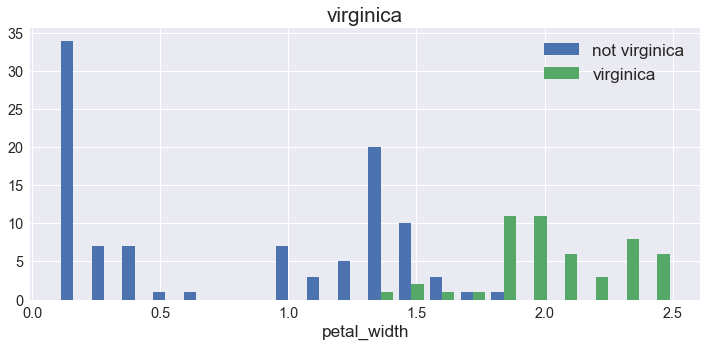

In [32]:
plot_histogram('virginica','petal_width')

# Problem we want to address: knowing the petal width, predict if the iris is a virginica

## 1.2 Logistic regression with sklearn: guessing virginica knowing the petal width

In [33]:
x = iris['petal_width'].reshape(-1,1)

In [34]:
y = iris.species.apply(lambda x: 1 if x=='virginica' else 0)

In [35]:
import sklearn.model_selection
import sklearn.linear_model
x_train, x_test, y_train, y_test = \
sklearn.model_selection.train_test_split(x,y,test_size = 0.2,random_state=0)

In [36]:
model_sklearn = sklearn.linear_model.LogisticRegression()

In [50]:
sklearn.__path__

['/Users/florentmartin/anaconda3/lib/python3.6/site-packages/sklearn']

In [37]:
model_sklearn.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

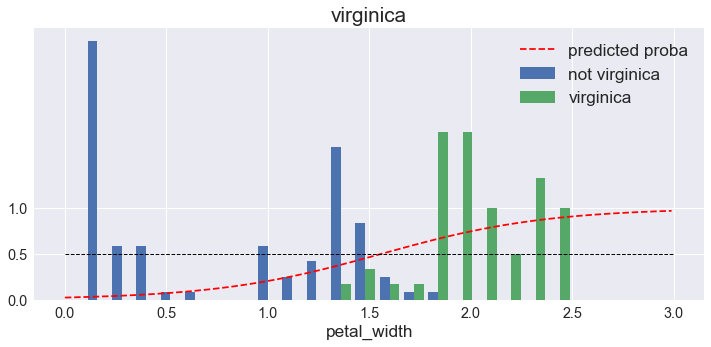

In [38]:
plot_histogram('virginica','petal_width',normed=True)
petal_widths = np.arange(0,3,0.01)
predicted_proba = model_sklearn.predict_proba(petal_widths.reshape(-1,1))[:,1]
plt.plot(petal_widths,predicted_proba,'r--',label='predicted proba')
plt.plot([0,3],[.5,.5],'k--',linewidth=1)
plt.legend(fontsize='x-large')
plt.yticks([0,0.5,1]);

In [40]:
x_train.shape

(120, 1)

In [45]:
(model_sklearn.predict(x_train) == y_train).sum()

113

In [38]:
accuracy_train = model_sklearn.score(x_train,y_train)
print(accuracy_train)
# normally the score should be 0.958333 = 115/120
# knowing that there are 5 misclassified, on a total of 120=x_train.shape[0]

0.941666666667


In [39]:
# prediction_train = logistic_classifier.predict_proba(x)
# loss_train = sklearn.metrics.log_loss(y,prediction_train)
# print(loss_train)

In [41]:
accuracy_test = model_sklearn.score(x_test,y_test)
print(accuracy_test)

0.966666666667


In [42]:
# prediction_test = logistic_classifier.predict_proba(x)
# test_loss = sklearn.metrics.log_loss(y,prediction_test)
# print(test_loss)

In [43]:
print('coefficients:',model_sklearn.coef_ , model_sklearn.intercept_)
#model_sklearn.predict_proba([[1.]])

coefficients: [[ 2.44921865]] [-3.82088392]


# Keras

In [108]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from keras import optimizers

In [109]:
model_keras = Sequential()

In [110]:
layer0 = Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(.1))
model_keras.add(layer0)

In [111]:
layer1 = Activation('sigmoid')
model_keras.add(layer1)

In [112]:
model_keras.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
#log_classifier.evaluate(x,y)

In [113]:
def initialize_keras(reg = .1):
    model_keras = Sequential()
    layer0 = Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(reg))
    model_keras.add(layer0)
    layer1 = Activation('sigmoid')
    model_keras.add(layer1)
    
    sgd = optimizers.SGD(lr=0.05)
    
    model_keras.compile(optimizer=sgd, loss='binary_crossentropy',metrics=['accuracy'])
    return model_keras

In [114]:
model_keras.fit(x_train,y_train,epochs=100)

Epoch 1/100
120/120 [==============================] - 1s 5ms/step - loss: 0.7147 - acc: 0.3667
Epoch 2/100
120/120 [==============================] - 0s 87us/step - loss: 0.7101 - acc: 0.3667
Epoch 3/100
120/120 [==============================] - 0s 79us/step - loss: 0.7057 - acc: 0.3667
Epoch 4/100
120/120 [==============================] - 0s 90us/step - loss: 0.7016 - acc: 0.3667
Epoch 5/100
120/120 [==============================] - 0s 93us/step - loss: 0.6973 - acc: 0.3750
Epoch 6/100
120/120 [==============================] - 0s 104us/step - loss: 0.6935 - acc: 0.4000
Epoch 7/100
120/120 [==============================] - 0s 94us/step - loss: 0.6895 - acc: 0.4000
Epoch 8/100
120/120 [==============================] - 0s 79us/step - loss: 0.6858 - acc: 0.4000
Epoch 9/100
120/120 [==============================] - 0s 97us/step - loss: 0.6826 - acc: 0.5167
Epoch 10/100
120/120 [==============================] - 0s 107us/step - loss: 0.6794 - acc: 0.6000
Epoch 11/100
120/120 [======

Epoch 83/100
120/120 [==============================] - ETA: 0s - loss: 0.5962 - acc: 0.937 - 0s 85us/step - loss: 0.5971 - acc: 0.9417
Epoch 84/100
120/120 [==============================] - 0s 91us/step - loss: 0.5966 - acc: 0.9417
Epoch 85/100
120/120 [==============================] - 0s 88us/step - loss: 0.5963 - acc: 0.9417
Epoch 86/100
120/120 [==============================] - 0s 130us/step - loss: 0.5955 - acc: 0.9417
Epoch 87/100
120/120 [==============================] - 0s 87us/step - loss: 0.5952 - acc: 0.9417
Epoch 88/100
120/120 [==============================] - 0s 82us/step - loss: 0.5946 - acc: 0.9417
Epoch 89/100
120/120 [==============================] - 0s 77us/step - loss: 0.5941 - acc: 0.9417
Epoch 90/100
120/120 [==============================] - 0s 78us/step - loss: 0.5937 - acc: 0.9417
Epoch 91/100
120/120 [==============================] - 0s 96us/step - loss: 0.5931 - acc: 0.9417
Epoch 92/100
120/120 [==============================] - 0s 91us/step - loss: 0.

In [115]:
model_keras.evaluate(x,y,verbose=0)

[0.58878505388895674, 0.9600000015894572]

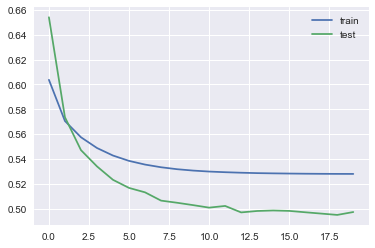

In [116]:
model_keras = initialize_keras()
num_steps = 20
epochs = 10
steps = range(num_steps)
loss = np.zeros(num_steps)
loss_test = np.zeros_like(loss)
for i in steps:
    model_keras.fit(x_train,y_train,epochs=epochs,verbose=0)
    loss[i] = model_keras.evaluate(x_train,y_train,verbose=0)[0]
    loss_test[i] = model_keras.evaluate(x_test,y_test,verbose=0)[0]
    
plt.plot(steps,loss,label='train')
plt.plot(steps,loss_test,label='test')
plt.legend()

In [117]:
w = model_keras.get_weights()

In [118]:
w

[array([[ 0.87797654]], dtype=float32), array([-1.66171277], dtype=float32)]

In [119]:
# log_classifier.predict(x)
# returns an array of shape (-1,1)

WITH REGULARIZATION = .1 THE PROBAS CURVE IS MUCH FLATTER (HOWEVER EPOCHS LARGE IS)THAN WITH SKLEARN

ONE NEEDS REG = .01 AND 5000 EPOCHS TO GET THE SAME CURVE AS WITH SKLEARN

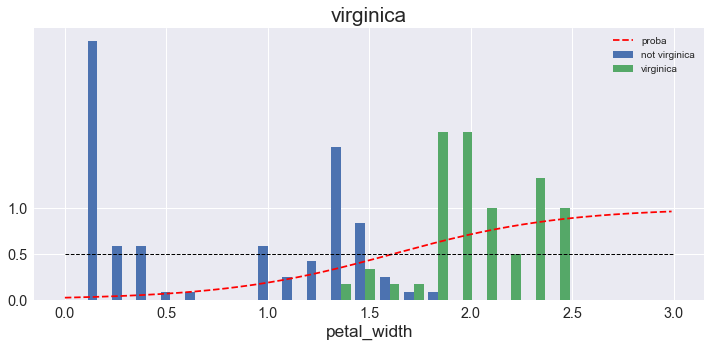

In [122]:
model_keras = initialize_keras(reg=.01)
plot_histogram('virginica','petal_width',normed=True)
petal_widths = np.arange(0,3,0.01)
model_keras.fit(x_train,y_train,epochs=500,verbose=0)
predicted_proba = model_keras.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths,predicted_proba,'r--',label='proba')
plt.plot([0,3],[.5,.5],'k--',linewidth=1)
plt.legend()
plt.yticks([0,0.5,1]);

## The sigmoid function

Here the logistic regression algorithm does the following: try to find a function 
$$ P_{normal} : [0,100] \to [0,1]$$
such that for a random value of a coordinate $x \in [0,100]$,   

$ P_{normal}(x)$ is an estimate (= a guess) of the probability that the traffic is slow.

The idea of logistic regression is to look for a function of the form:
$$ P_{normal}(x) = \sigma(wx+b)$$
where 
$$\sigma : \mathbb{R} \to [0,1]$$ is the **sigmoid function ** defined by 
$$ \sigma(x) = \frac{1}{1+e^{-x}}$$

In [123]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

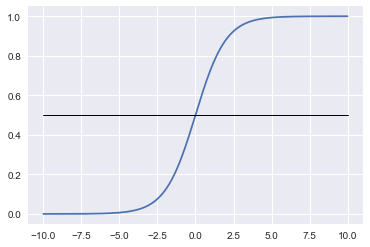

In [130]:
x_sigmoid = np.arange(-10,10,0.01)
y_sigmoid = sigmoid(x_sigmoid)
_ = plt.plot(x_sigmoid,y_sigmoid)
plt.plot([-10,10],[0.5,0.5],'k-',linewidth=1)

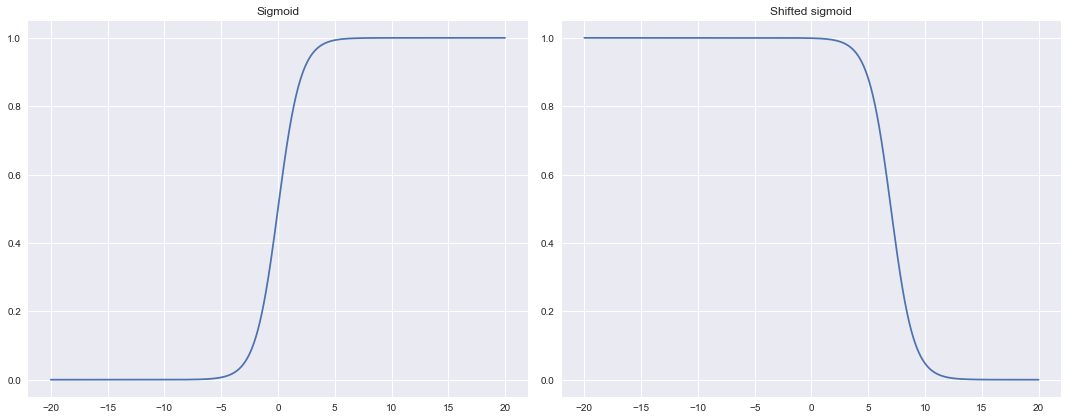

In [124]:
plt.figure(figsize=(15,6))

plt.subplot(121)
x_sigmoid = np.arange(-20,20,0.01)
y_sigmoid = sigmoid(x_sigmoid)
_ = plt.plot(x_sigmoid,y_sigmoid)
plt.title('Sigmoid')
plt.subplot(122)
w = -1
b = 7
y_shifted = sigmoid(w*x_sigmoid + b)
_ = plt.plot(x_sigmoid,y_shifted)
plt.title('Shifted sigmoid')
plt.tight_layout()

Ajouter graphe du reseau neronal

# (Section 2) Gradient descent

# Meshgrid heatplot with sklearn

In [ ]:
# dx, dy = 0.05, 0.05
# y, x = np.mgrid[slice(1, 5 + dy, dy),
#                 slice(1, 5 + dx, dx)]

In [ ]:
# def get_loss(weigth,bias,x,y,C=1.):
#     """Compute the loss function."""
#     model = sklearn.linear_model.LogisticRegression()
#     model.coef_ = np.array([[weigth]])
#     model.intercept_ = np.array([[bias]])
#     pred = model.predict_proba(x)[:,1]
#     #print(pred)
#     log_loss = x.shape[0]*sklearn.metrics.log_loss(y,pred)
#     #print(log_loss)
#     loss = 0.5*(weigth**2 + bias**2) + C*log_loss
#     return loss

# def get_loss1(weigth,bias):
#     return get_loss(weigth,bias,x_train,y_train,1.)
# vloss = np.vectorize(get_loss1)

In [132]:
def get_meshgrid(xstart,xend,xstep,ystart,yend,ystep):
    xx,yy = np.mgrid[xstart:xend:xstep,ystart:yend:ystep]
    return xx,yy

xx,yy = get_meshgrid(0,5,.1,-10,0,.1)
x_grid, y_grid = get_meshgrid(0,5,.1,-10,0,.1)

In [ ]:
loss = vloss(xx,yy)

In [ ]:
import matplotlib.colors as colors
fig = plt.figure(figsize=(17,7))
#plt.pcolor(xx,yy,loss,cmap='RdBu_r')
plt.pcolor(xx,yy,loss,norm=colors.LogNorm(),cmap='RdBu_r')
plt.colorbar()
CS = plt.contour(xx, yy, loss,20)
plt.title('Loss function')
plt.xlabel('weight')
plt.ylabel('bias')

#plt.plot([-0,40],[-0*(-1.7),40*(-1.7)],'w--')

In [ ]:
# plt.figure(figsize=(15,7))
# #plt.pcolor(xx,yy,l,norm=colors.LogNorm(),cmap='RdBu_r')
# # plt.pcolor(xx,yy,loss,cmap='RdBu_r')
# # plt.colorbar()
# #plt.plot([-0,40],[-0*(-1.7),40*(-1.7)],'w--')
# CS = plt.contour(xx, yy, loss,50)
# plt.clabel(CS, inline=1, fontsize=10)

In [ ]:
idx = np.argmin(loss)
print(xx.flatten()[idx],yy.flatten()[idx])

# Optimization, gradient descent with Keras

In [141]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.models import Model
from keras import optimizers
from keras import regularizers

In [142]:
def get_meshgrid(xstart,xend,xstep,ystart,yend,ystep):
    xx,yy = np.mgrid[xstart:xend:xstep,ystart:yend:ystep]
    return xx,yy

x,yy = get_meshgrid(0,5,.1,-10,0,.1)
x_grid, y_grid = get_meshgrid(0,5,.1,-10,0,.1)

In [143]:
model = Sequential()
model.add(Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(.1)))
model.add(Activation('sigmoid'))

In [144]:
sgd = optimizers.SGD(lr=0.05)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [145]:
weight = 4
bias = 4
layer =  model.layers[0]
layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 

In [146]:
def initialise_keras_model(initial_weight = 4,initial_bias = 4,lr=0.05):
    model = Sequential()
    model.add(Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(.1)))
    model.add(Activation('sigmoid'))
    sgd = optimizers.SGD(lr=lr)
    model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
    initial_weight = 4
    initial_bias = 4
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[initial_weight]]) , np.array([initial_bias]) ] ) 
    return model

In [147]:
#history = model.fit(x_train,y_train,epochs=10,verbose=0)
# model.get_weights()
# loss = model.evaluate(x_train,y_train,verbose=0)[0]
# model.test_on_batch(x_train,y_train)
# model.train_on_batch(x_train,y_train)
# model.get_weights()

In [157]:
def get_loss(model,weight,bias,x,y,C=1.):
    """Compute the loss function."""
#     model = sklearn.linear_model.LogisticRegression()
#     model.coef_ = np.array([[weigth]])
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 
    loss = model.evaluate(x_train,y_train,verbose=0)[0]
    #print(pred)
    #log_loss = x.shape[0]*sklearn.metrics.log_loss(y,pred)
    #print(log_loss)
    #loss = 0.5*(weigth**2 + bias**2) + C*log_loss
    return loss

def get_loss1(weigth,bias):
    return get_loss(model,weigth,bias,x_train,y_train,1.)

vloss = np.vectorize(get_loss1)

def get_meshgrid(xstart,xend,xstep,ystart,yend,ystep):
    xx,yy = np.mgrid[xstart:xend:xstep,ystart:yend:ystep]
    return xx,yy

In [158]:
# xx,yy = get_meshgrid(-10,10,.1,-10,10,.1)
# loss_grid = vloss(xx,yy)

# import pickle
# with open('../data/loss_grid', 'wb') as f:
#     # Pickle the 'data' dictionary using the highest protocol available.
#     pickle.dump(loss_grid, f)

In [159]:
import pickle
with open('../data/loss_grid', 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    loss_grid =pickle.load(f)

In [160]:
model = initialise_keras_model(lr=0.1)
model.fit(x_train,y_train,verbose=0,epochs = 40)

In [161]:
print(model.metrics_names)
model.evaluate(x_train,y_train)

['loss', 'acc']
120/120 [==============================] - 0s 3ms/step


[0.57421501080195114, 0.9583333293596904]

In [164]:
x_grid.shape

(50, 100)

In [165]:
y_grid.shape

(50, 100)

In [167]:
loss_grid.shape

(200, 200)

TypeError: Dimensions of C (200, 200) are incompatible with X (100) and/or Y (50); see help(pcolor)

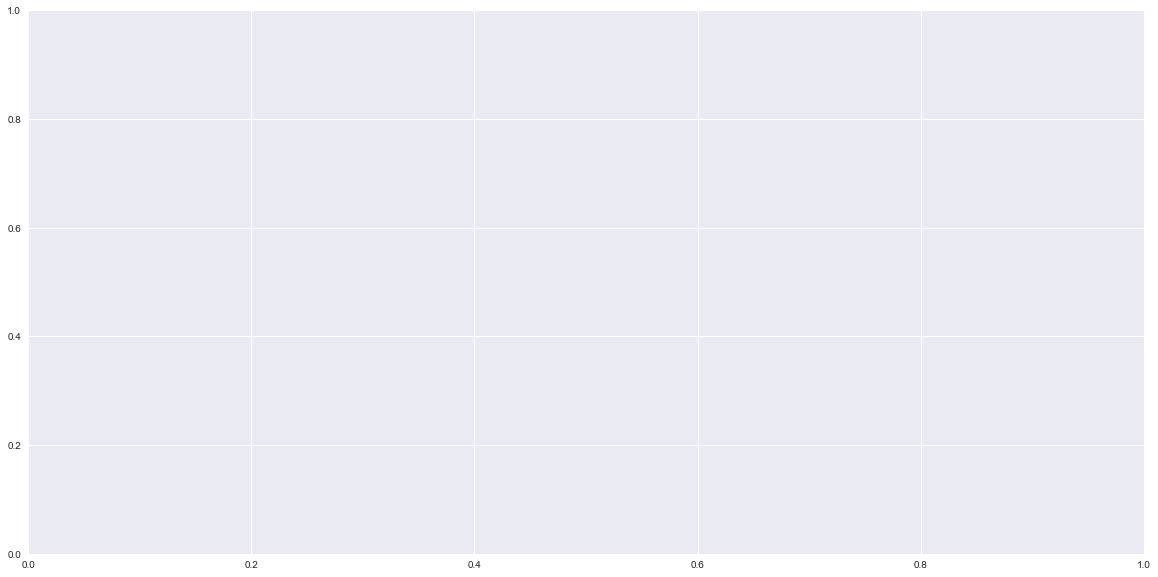

In [163]:
model = initialise_keras_model()
steps = 10
import matplotlib.colors as colors
fig = plt.figure(figsize=(20,10))
#plt.pcolor(xx,yy,loss,cmap='RdBu_r')
plt.pcolor(x_grid,y_grid,loss_grid,norm=colors.LogNorm(),cmap='RdBu_r')
plt.colorbar()
#plt.pcolor(xx,yy,loss_grid,cmap='RdBu_r')
CS = plt.contour(x_grid, y_grid, loss_grid,20)


plt.title('Loss function')
plt.xlabel('weight')
plt.ylabel('bias')
for i in range(steps):
    old_weight, old_bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    model.fit(x_train,y_train,verbose=0,epochs = 8)
    weight, bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    plt.plot([old_weight,weight],[old_bias,bias],'kX--',markersize=8)


plot accuracy

In [ ]:
def get_accuracy(model,weight,bias,x,y,C=1.):
    """Compute the accuracy function."""
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 
    accuracy = model.evaluate(x,y,verbose=0)[1]
    #print(pred)
    #log_loss = x.shape[0]*sklearn.metrics.log_loss(y,pred)
    #print(log_loss)
    #loss = 0.5*(weigth**2 + bias**2) + C*log_loss
    return accuracy

def get_accuracy1(weigth,bias):
    return get_accuracy(model,weigth,bias,x_train,y_train,1.)

vaccuracy = np.vectorize(get_accuracy1)

def get_meshgrid(xstart,xend,xstep,ystart,yend,ystep):
    xx,yy = np.mgrid[xstart:xend:xstep,ystart:yend:ystep]
    return xx,yy

In [ ]:
# xx,yy = get_meshgrid(-10,10,.1,-10,10,.1)
acc_grid = vaccuracy(xx,yy)

In [ ]:
# import pickle
# with open('../data/loss_grid', 'wb') as f:
#     # Pickle the 'data' dictionary using the highest protocol available.
#     pickle.dump(loss_grid, f)

In [ ]:
model = initialise_keras_model()
steps = 10
import matplotlib.colors as colors
fig = plt.figure(figsize=(20,10))
#plt.pcolor(xx,yy,loss,cmap='RdBu_r')
#plt.pcolor(xx,yy,acc_grid,norm=colors.LogNorm(),cmap='RdBu_r')
plt.pcolor(xx,yy,acc_grid,cmap='RdBu_r')

plt.colorbar()
#plt.pcolor(xx,yy,loss_grid,cmap='RdBu_r')
# CS = plt.contour(xx, yy, acc_grid,20)


plt.title('accuracy function')
plt.xlabel('weight')
plt.ylabel('bias')

# for i in range(steps):
#     old_weight, old_bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
#     model.fit(x_train,y_train,verbose=0,epochs = 8)
#     weight, bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
#     plt.plot([old_weight,weight],[old_bias,bias],'kX--',markersize=8)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx,yy,loss_grid,cmap=cm.coolwarm)

model = initialise_keras_model()
steps = 10
for i in range(steps):
    old_weight, old_bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    old_loss =model.evaluate(x_train,y_train,verbose=0)[0]
    model.fit(x_train,y_train,verbose=0,epochs = 5)
    weight, bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    new_loss = model.evaluate(x_train,y_train,verbose=0)[0]
    plt.plot([old_weight,weight],[old_bias,bias],[old_loss,new_loss],'k--',markersize=8)

# Logistic regression with Keras

In [ ]:
model = Sequential()
model.add(Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('sigmoid'))

In [ ]:
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10, batch_size=64,verbose=0)

# Neural Networks: when linear methods are not sufficient

In [ ]:
plot_histogram('versicolor','petal_width')

In [ ]:
# for name,group in grouped:
#     print(name)
#     print(group)

In [ ]:
# plt.figure(figsize=(10,7))
# sns.barplot(x='petal_length',hue='species_setosa',data=iris_dummies)

# Playground

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, InputLayer

model = Sequential([
    InputLayer([10]),
    Dense(1)
])
model.trainable = True
model.compile("adam", "mse")

x = np.random.uniform(-1, 1, [8, 10])
y = np.random.uniform(-1, 1, [8])

print(model.train_on_batch(x, y))
print(model.test_on_batch(x, y))
print(model.test_on_batch(x, y))
print(model.train_on_batch(x, y))
print(model.train_on_batch(x, y))

print(model.test_on_batch(x, y))
print(model.train_on_batch(x, y))
print(model.test_on_batch(x, y))